### CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. 
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for 
developing a AIML model which can predict the condition of the patient depending on the received test resultrithms

### DATA DESCRIPTION: 

The data consists of biomechanics features of the patients according to their current conditions. Each patient is 
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

### PROJECT OBJECTIVE: 

To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised 
Learning algorithms.

## Importing necessary libraries

In [413]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Part 1.1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [416]:
df1 = pd.read_csv('Normal.csv')
df2 = pd.read_csv('Type_H.csv')
df3 = pd.read_csv('Type_S.csv')

# Part 1.1 b - Print Shape and columns of all the 3 DataFrames

In [419]:
print("Shape and columns of df1:")
print(df1.shape)
print(df1.columns)

print("\nShape and columns of df2:")
print(df2.shape)
print(df2.columns)

print("\nShape and columns of df3:")
print(df3.shape)
print(df3.columns)

Shape and columns of df1:
(100, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Shape and columns of df2:
(60, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Shape and columns of df3:
(150, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


# Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations

In [422]:
print("\nColumn names of all DataFrames:")
print(f"df1 columns: {list(df1.columns)}")
print(f"df2 columns: {list(df2.columns)}")
print(f"df3 columns: {list(df3.columns)}")


Column names of all DataFrames:
df1 columns: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
df2 columns: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
df3 columns: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


## The column names are same for all 3 dataframes

# Part 1.1 d - Print DataTypes of all the 3 DataFrames

In [426]:
print("\nDataTypes of df1:")
print(df1.dtypes)

print("\nDataTypes of df2:")
print(df2.dtypes)

print("\nDataTypes of df3:")
print(df3.dtypes)


DataTypes of df1:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

DataTypes of df2:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

DataTypes of df3:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [428]:
print("\nTop 5 of df1:")
df1.head()



Top 5 of df1:


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [430]:
print("\nTop 5 of df2:")
df2.head()


Top 5 of df2:


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [432]:
print("\nTop 5 of df3:")
df3.head()


Top 5 of df3:


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


# Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DataFrames

In [435]:
print("\nVariation in 'Class' feature:")
print(df1['Class'].value_counts())
print(df2['Class'].value_counts())
print(df3['Class'].value_counts())


Variation in 'Class' feature:
Class
Normal    73
Nrmal     27
Name: count, dtype: int64
Class
Type_H    37
type_h    23
Name: count, dtype: int64
Class
Type_S    133
tp_s       17
Name: count, dtype: int64


# Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [438]:
# Step 1: Identify unique values for the `Class` column in each DataFrame
print("\nUnique values in 'Class' column of df1:")
print(df1['Class'].unique())

print("\nUnique values in 'Class' column of df2:")
print(df2['Class'].unique())

print("\nUnique values in 'Class' column of df3:")
print(df3['Class'].unique())

# Step 2: Create a mapping dictionary for unifying the `Class` values
class_mapping_df1 = {'Normal': 'Normal'}
class_mapping_df2 = {'Type_H': 'Type_H'}
class_mapping_df3 = {'Type_S': 'Type_S'}

# Step 3: Apply this mapping to each DataFrame's `Class` column
df1['Class'] = df1['Class'].map(class_mapping_df1)
df2['Class'] = df2['Class'].map(class_mapping_df2)
df3['Class'] = df3['Class'].map(class_mapping_df3)

# Verify the unification
print("\nUnified 'Class' column in df1:")
print(df1['Class'].unique())

print("\nUnified 'Class' column in df2:")
print(df2['Class'].unique())

print("\nUnified 'Class' column in df3:")
print(df3['Class'].unique())

# Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

# Check the combined DataFrame
print("\nCombined DataFrame:")
print(df_combined.head())



Unique values in 'Class' column of df1:
['Normal' 'Nrmal']

Unique values in 'Class' column of df2:
['Type_H' 'type_h']

Unique values in 'Class' column of df3:
['Type_S' 'tp_s']

Unified 'Class' column in df1:
['Normal' nan]

Unified 'Class' column in df2:
['Type_H' nan]

Unified 'Class' column in df3:
['Type_S' nan]

Combined DataFrame:
   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal


# Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame

In [441]:
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

# Part 1.2 c - Print 5 random samples of this DataFrame

In [444]:
print("\n5 random samples of combined DataFrame:")
print(df_combined.sample(5))


5 random samples of combined DataFrame:
     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
223    65.665347  10.540675  56.489135  55.124672  109.162777   53.932020   
37     49.828135  16.736435  28.000000  33.091700  121.435558    1.913307   
115    44.318907  12.537992  36.098763  31.780915  124.115836    5.415825   
175    70.221452  39.822724  68.118403  30.398728  148.525562  145.378143   
183    81.104100  24.794168  77.887020  56.309932  151.839857   65.214616   

      Class  
223  Type_S  
37   Normal  
115  Type_H  
175  Type_S  
183  Type_S  


In [446]:
df_combined.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [448]:
df_combined.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


# Part 1.2 c - Print 5 random samples of this DataFrame

In [451]:
print("\n5 random samples of combined DataFrame:")
print(df_combined.sample(5))


5 random samples of combined DataFrame:
     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
228    90.513961  28.272501  69.813942  62.241459  100.892160  58.823648   
239    85.095503  21.069897  91.734792  64.025606  109.062312  38.032831   
160    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906   
145    50.912440  23.015169  47.000000  27.897271  117.422259  -2.526702   
258    57.035097   0.345728  49.198003  56.689369  103.048698  52.165145   

      Class  
228  Type_S  
239  Type_S  
160  Type_S  
145     NaN  
258  Type_S  


# Part 1.2 d - Print Feature-wise percentage of Null values

In [454]:
print("\nFeature-wise percentage of Null values:")
print(df_combined.isnull().mean() * 100)


Feature-wise percentage of Null values:
P_incidence     0.000000
P_tilt          0.000000
L_angle         0.000000
S_slope         0.000000
P_radius        0.000000
S_Degree        0.000000
Class          21.612903
dtype: float64


# Part 1.2 e - Check 5-point summary of the new DataFrame

In [457]:
print("\n5-point summary of the combined DataFrame:")
print(df_combined.describe().T)


5-point summary of the combined DataFrame:
             count        mean        std        min         25%         50%  \
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082  


# Part 1.3 a - Visualize a heatmap to understand correlation between all features

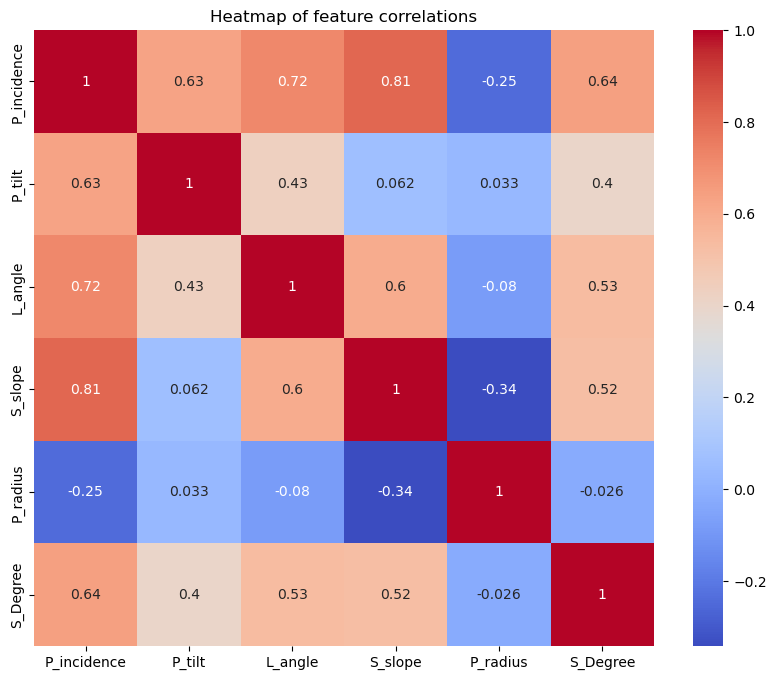

In [460]:
# Assuming df_combined is a DataFrame containing both numeric and non-numeric columns
# Option 1: Remove non-numeric columns before creating the heatmap
numeric_df = df_combined.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of feature correlations')
plt.show()


## S_slope is highly corelated with S-Degree and negatively corelated with P_radius

# Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights

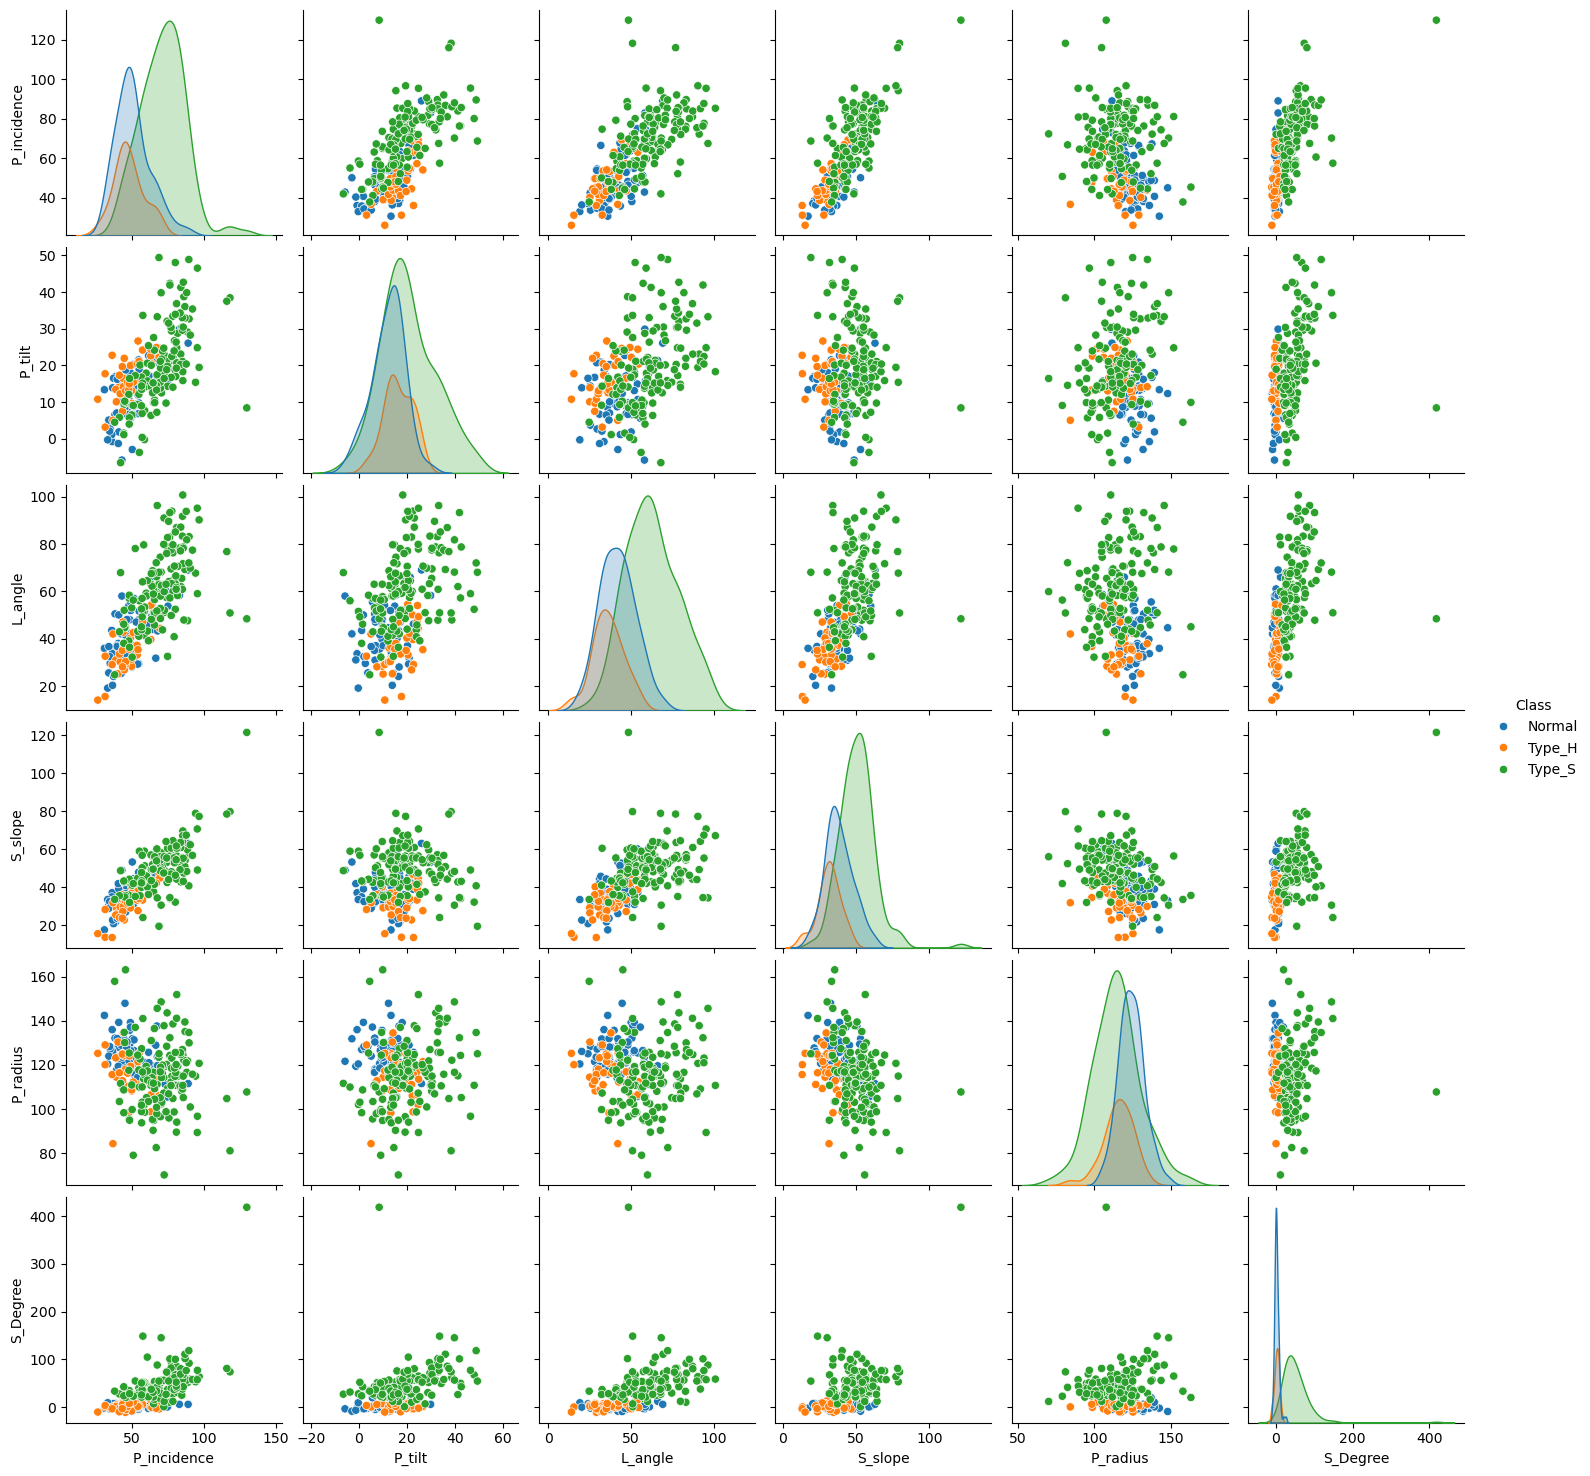

In [464]:
sns.pairplot(df_combined, hue='Class')
plt.show()

# Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

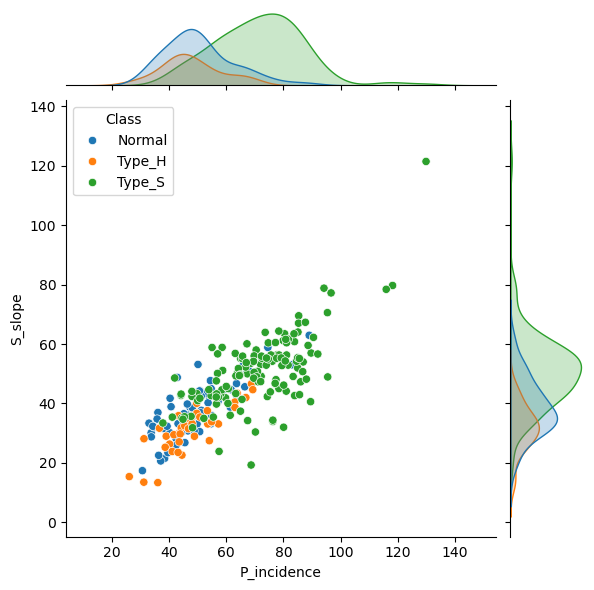

In [466]:
sns.jointplot(data=df_combined, x='P_incidence', y='S_slope', hue='Class')
plt.show()

# Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.

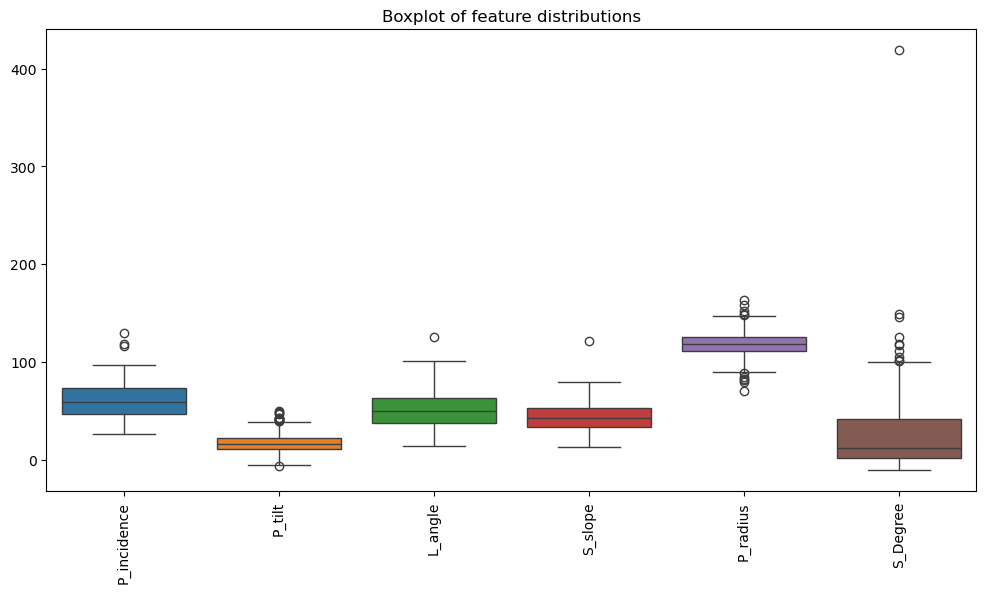

In [468]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined)
plt.xticks(rotation=90)
plt.title('Boxplot of feature distributions')
plt.show()

# Part 1.4 a - Split data into X and Y

In [471]:
X = df_combined.drop('Class', axis=1)
y = df_combined['Class']

# Part 1.4 b - Split data into train and test with 80:20 proportion

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [478]:
X_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
126,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108
109,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437
247,55.080766,-3.759930,56.000000,58.840695,109.915367,31.773583
234,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134
202,70.399308,13.469986,61.200000,56.929322,102.337524,25.538429


# Check for NaN values in y_train and y_test

In [481]:
print("Checking for NaN values in y_train:")
print(y_train.isnull().sum())

print("Checking for NaN values in y_test:")
print(y_test.isnull().sum())

Checking for NaN values in y_train:
54
Checking for NaN values in y_test:
13


# Drop NaN values in y_train and y_test

In [484]:
y_train = y_train.dropna()
y_test = y_test.dropna()

# Ensure X_train and y_train have the same indices after dropping NaN values

In [487]:
X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

# Impute missing values in X_train and X_test

In [490]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data

In [493]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Verify there are no NaN values after scaling

In [496]:
print("\nAfter scaling:")
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())


After scaling:
NaN values in X_train_scaled: 0
NaN values in X_test_scaled: 0


# Now train the KNN classifier

In [499]:
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

In [501]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

# Evaluate the model

In [504]:
predicted_labels = knn.predict(X_test)
knn.score(X_test, y_test)

0.8571428571428571

In [506]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

print("\nTraining Performance:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nTesting Performance:")
print(classification_report(y_test, y_test_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Training Performance:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00        56
      Type_H       0.00      0.00      0.00        29
      Type_S       0.56      1.00      0.72       109

    accuracy                           0.56       194
   macro avg       0.19      0.33      0.24       194
weighted avg       0.32      0.56      0.40       194

Training Accuracy: 0.5618556701030928

Testing Performance:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00        17
      Type_H       0.00      0.00      0.00         8
      Type_S       0.49      1.00      0.66        24

    accuracy                           0.49        49
   macro avg       0.16      0.33      0.22        49
weighted avg       0.24      0.49      0.32        49

Testing Accuracy: 0.4897959183673469


# Part 1.5 a - Experiment with various parameters to improve performance of the base model

In [509]:
best_k = 5
best_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_test_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest k value: {best_k}")
print(f"Best accuracy: {best_accuracy}")


Best k value: 15
Best accuracy: 0.8571428571428571


# Part 1.5 b - Clearly showcase improvement in performance achieved

In [512]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_test_pred = knn.predict(X_test_scaled)
print("\nImproved Testing Performance:")
print(classification_report(y_test, y_test_pred))
print("Improved Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Improved Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Improved Testing Performance:
              precision    recall  f1-score   support

      Normal       0.73      0.94      0.82        17
      Type_H       1.00      0.50      0.67         8
      Type_S       0.96      0.92      0.94        24

    accuracy                           0.86        49
   macro avg       0.89      0.79      0.81        49
weighted avg       0.88      0.86      0.85        49

Improved Testing Accuracy: 0.8571428571428571
Improved Testing Confusion Matrix:
[[16  0  1]
 [ 4  4  0]
 [ 2  0 22]]


# Part 1.5 c - Clearly state which parameters contributed most to improve model performance.

In this case, the value of 'k' in KNN was varied and the best 'k' was found to improve the performance.

# Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [516]:
data1 = pd.read_csv('Data1.csv')
data2 = pd.read_csv('Data2.csv')


In [518]:
data1.head()


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [520]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


# Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes

In [523]:
print("\nShape, Columns and DataTypes of data1:")
print(data1.shape)
print(data1.columns)
print(data1.dtypes)


Shape, Columns and DataTypes of data1:
(5000, 8)
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [525]:
print("\nShape, Columns and DataTypes of data2:")
print(data2.shape)
print(data2.columns)
print(data2.dtypes)


Shape, Columns and DataTypes of data2:
(5000, 7)
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


# Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [528]:
df_merged = pd.merge(data1, data2, on='ID')

In [530]:
df_merged.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


# Part 2.1 d - Change Datatype of below features to ‘Object’

In [533]:
features_to_change = ['FixedDepositAccount', 'InternetBanking', 'InternetBanking', 'CreditCard', 'Security', 'Level', 'HiddenScore']  # Replace with actual feature names
for feature in features_to_change:
    df_merged[feature] = df_merged[feature].astype('object')

In [535]:
df_merged.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


# Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

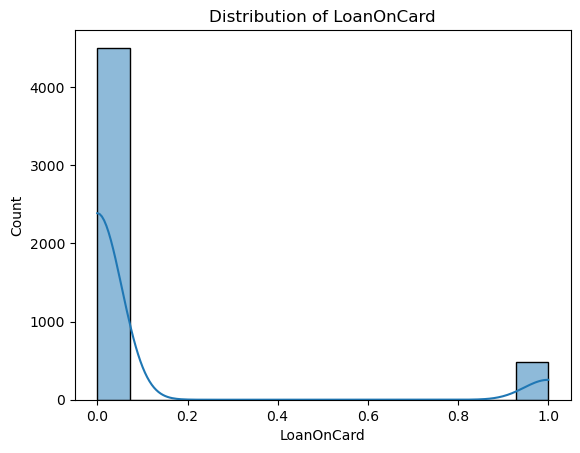

In [538]:
sns.histplot(df_merged['LoanOnCard'], kde=True)
plt.title('Distribution of LoanOnCard')
plt.show()

# Part 2.2 b - Check the percentage of missing values and impute if required

In [541]:
print("\nPercentage of missing values:")
print(df_merged.isnull().mean() * 100)


Percentage of missing values:
ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


# Impute missing values

In [544]:
for column in df_merged.columns:
    if df_merged[column].isnull().sum() > 0:
        if df_merged[column].dtype == 'object':
            df_merged[column].fillna(df_merged[column].mode()[0], inplace=True)
        else:
            df_merged[column].fillna(df_merged[column].mean(), inplace=True)

In [546]:
df_merged.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.096386
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.096386
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.096386
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.096386
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.096386


# Part 2.2 c - Check for unexpected values in each categorical variable and impute with best suitable value.

In [549]:
for column in df_merged.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {column}:")
    print(df_merged[column].value_counts())


Value counts for HiddenScore:
HiddenScore
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

Value counts for Level:
Level
1    2096
3    1501
2    1403
Name: count, dtype: int64

Value counts for Security:
Security
0    4478
1     522
Name: count, dtype: int64

Value counts for FixedDepositAccount:
FixedDepositAccount
0    4698
1     302
Name: count, dtype: int64

Value counts for InternetBanking:
InternetBanking
1    2984
0    2016
Name: count, dtype: int64

Value counts for CreditCard:
CreditCard
0    3530
1    1470
Name: count, dtype: int64


# Part 2.3 a - Split data into X and Y

In [552]:
X = df_merged.drop('LoanOnCard', axis=1)
y = df_merged['LoanOnCard']

In [554]:
y = y.astype('category')

# Part 2.3 b - Split data into train and test. Keeping 25% data reserved for testing

In [557]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [559]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [561]:
# fitting the linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [563]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [565]:
def mape_score(targets, predictions):
    # Convert targets to numerical values if they are categorical
    if targets.dtype.name == 'category':
        targets = targets.cat.codes
    
    return np.mean(np.abs(targets - predictions) / targets) * 100


In [567]:
# Checking model performance on train set
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228186,0.155539,0.391659,0.38939,inf


In [569]:
# Checking model performance on test set
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237326,0.160366,0.370172,0.364662,inf


# Part 2.4 a - Train a base model each for SVM, KNN

In [577]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your features and 'y' contains your continuous target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (recommended for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the SVR model
svr_model = SVR(kernel='linear')

# Training the SVR model
svr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_svr)
print("SVR Mean Squared Error:", mse)


SVR Mean Squared Error: 0.06874866400478605


In [581]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your features and 'y' contains your continuous target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (recommended for KNeighborsRegressor)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Training the KNeighborsRegressor model
knn_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_knn)
print("KNeighborsRegressor Mean Squared Error:", mse)


KNeighborsRegressor Mean Squared Error: 0.03743734649441138


In [587]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)

# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR MSE:", mse_svr)


Linear Regression MSE: 0.054563136451544356
Random Forest MSE: 0.008204109478879373
SVR MSE: 0.09392254352430768


# Linear Regression:

Linear Regression has a relatively higher MSE compared to the Random Forest but lower than SVR. This indicates that Linear Regression is not capturing the complexity of the data as well as the Random Forest model.

# Random Forest Regressor

Random Forest has the lowest MSE among the three models, suggesting that it is performing the best in predicting the target variable. This is likely due to its ability to capture non-linear relationships and interactions between features.

# Support Vector Regressor (SVR):

SVR has the highest MSE, indicating that it is performing the worst among the three models. This could be due to several factors, such as the choice of kernel, hyperparameters, or the nature of the data itself.


# What it says

Based on the MSE values, Random Forest Regressor is the best-performing model for the dataset. It significantly outperforms both Linear Regression and SVR.
The relatively high MSE of Linear Regression suggests that the relationship between features and the target variable is not purely linear, and more complex models like Random Forest are needed to capture this relationship.

# Cross Validation

In [590]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=5)
mse_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -mse_scores.mean())


Cross-validated MSE: 0.08744361300624184


# Model Performance:

The cross-validated MSE of 0.0874 indicates the average error of the KNN model in predicting the target variable across different subsets of the training data.
       - Compared to the previously obtained MSEs:
           - Linear Regression: 0.0546
           - Random Forest Regressor: 0.0082
           - SVR: 0.0939
The KNN model's MSE is worse than that of Random Forest and Linear Regression but slightly better than SVR.

# Model Suitability:

The higher MSE of KNN compared to Random Forest suggests that KNN might not be the most suitable model for this dataset. KNN may not be capturing the underlying patterns in the data as effectively as Random Forest.
However, the KNN model performs better than SVR, indicating that it might still be a viable option with some tuning.
